In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv('gisette_train.data', header=None, delim_whitespace=True)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,550,0,495,0,0,0,0,976,0,0,...,0,0,0,991,991,0,0,0,0,983
1,0,0,0,0,0,0,0,976,0,0,...,0,475,0,991,0,0,991,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,742,0,0,0,0,684,0,956,...,0,0,0,0,0,0,674,0,0,838
4,0,0,0,0,0,0,0,608,0,979,...,991,0,0,828,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,983,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,541,0,0,945,0,0,0
7,0,0,991,0,0,0,0,0,0,0,...,995,0,0,0,0,0,631,0,0,483
8,0,0,983,0,0,652,0,0,0,0,...,568,0,0,0,0,983,991,0,0,0
9,0,0,0,0,0,0,0,770,0,983,...,0,0,0,684,705,0,0,0,0,656


In [16]:
df_gisette_labels = pd.read_csv('gisette_train.labels', header=None)
df_gisette_labels = df_gisette_labels.iloc[:,0]
df_gisette_labels

0       1
1      -1
2       1
3       1
4       1
       ..
5995   -1
5996    1
5997   -1
5998   -1
5999   -1
Name: 0, Length: 6000, dtype: int64

In [17]:
from sklearn.preprocessing import StandardScaler
#Normalize the data so that the data has a normal distribution -- mean = 0; stdev = 1
x = StandardScaler().fit_transform(df.values)
np.mean(x),np.std(x)

(-2.17544500931884e-19, 0.9954898291795854)

In [6]:
# Choosing the first 10 principal components
from sklearn.decomposition import PCA

pca_gisette = PCA(n_components=2)
principalComponents_gisette = pca_gisette.fit_transform(x)
principal_gisette_df = pd.DataFrame(data = principalComponents_gisette, columns = ['PC1', 'PC2']);
pca_gisette.explained_variance_ratio_ 

array([0.02883488, 0.02258951])

<Figure size 432x288 with 0 Axes>

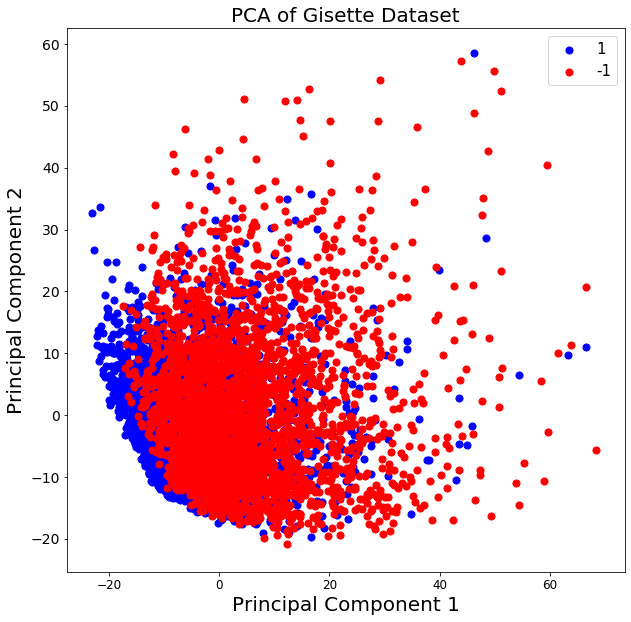

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component 1',fontsize=20)
plt.ylabel('Principal Component 2',fontsize=20)
plt.title("PCA of Gisette Dataset",fontsize=20)
targets = [1, -1]
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = df_gisette_labels == target
    plt.scatter(principal_gisette_df.loc[indicesToKeep, 'PC1']
               , principal_gisette_df.loc[indicesToKeep, 'PC2'], c = color, s =50)

plt.legend(targets,prop={'size': 15})

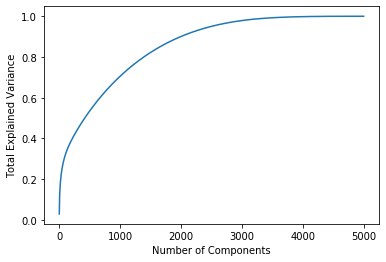

In [9]:
pca = PCA().fit(x)
evr = pca.explained_variance_ratio_
#Variance graph
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Total Explained Variance');